In [1]:
import pandas as pd
import numpy as np
from post_processing import error_estimation, merge_estimates_true, compute_val_metrics, under_over_analysis, under_over_by_method, val_metrics_per_iteration, boxplots, boxplots_per_iteration

In [2]:
data = {"method": ["CV", "CV", "Preq", "OOS", "Preq", "CV", "OOS", "OOS", "Preq", "CV"],    
        "model": ["ARIMA", "LSTM", "ARIMA", "ARIMA", "LSTM", "DT", "LSTM", "DT", "DT", "ARIMA"],
        "series": [1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
        "mse": [i**2 for i in range(1, 11)],
        "mae": [i*2 for i in range(1, 11)],
        "weights": [i for i in range(1, 11)]};

data2 = {"model": ["ARIMA", "LSTM", "DT", "ARIMA"],
         "series": [1, 1, 1, 2],
         "mse": [10, 10, 10, 10],
         "mae": [5, 5, 5, 5]};

In [3]:
df = pd.DataFrame(data);
test_df = pd.DataFrame(data2);

In [4]:
new_df = error_estimation(df);

In [5]:
test_df

,model,series,mse,mae
0,ARIMA,1,10,5
1,LSTM,1,10,5
2,DT,1,10,5
3,ARIMA,2,10,5


In [6]:
aggregate_data = pd.merge(left=new_df, right=test_df, on=["model", "series"], suffixes=["_estimate", "_true"])

In [7]:
aggregate_data["model"].unique()

array(['ARIMA', 'DT', 'LSTM'], dtype=object)

In [8]:
aggregate_data

,series,method,model,mse_estimate,mae_estimate,mse_true,mae_true
0,1,CV,ARIMA,1.0,2.0,10,5
1,1,CV,DT,36.0,12.0,10,5
2,1,CV,LSTM,4.0,4.0,10,5
3,1,OOS,ARIMA,16.0,8.0,10,5
4,1,OOS,DT,64.0,16.0,10,5
5,1,OOS,LSTM,49.0,14.0,10,5
6,1,Preq,ARIMA,9.0,6.0,10,5
7,1,Preq,DT,81.0,18.0,10,5
8,1,Preq,LSTM,25.0,10.0,10,5
9,2,CV,ARIMA,100.0,20.0,10,5


In [9]:
l1 = [1, 1, 2];
l2 = [5, 10, 15];

In [10]:
l3 = [L1 * L2 for L2 in l2 for L1 in l1]

In [11]:
l3

[5, 5, 10, 10, 10, 20, 15, 15, 30]

In [12]:
def func(row, arg):

    return row["mse_true"] + row["mae_true"], arg;

In [13]:
aggregate_data.apply(func, args=[1], axis=1)

0    (15, 1)
1    (15, 1)
2    (15, 1)
3    (15, 1)
4    (15, 1)
5    (15, 1)
6    (15, 1)
7    (15, 1)
8    (15, 1)
9    (15, 1)
dtype: object

In [14]:
aggregate_df = merge_estimates_true(new_df, test_df);

In [15]:
aggregate_df

,series,method,model,mse_estimate,mae_estimate,mse_true,mae_true
0,1,CV,ARIMA,1.0,2.0,10,5
1,1,CV,DT,36.0,12.0,10,5
2,1,CV,LSTM,4.0,4.0,10,5
3,1,OOS,ARIMA,16.0,8.0,10,5
4,1,OOS,DT,64.0,16.0,10,5
5,1,OOS,LSTM,49.0,14.0,10,5
6,1,Preq,ARIMA,9.0,6.0,10,5
7,1,Preq,DT,81.0,18.0,10,5
8,1,Preq,LSTM,25.0,10.0,10,5
9,2,CV,ARIMA,100.0,20.0,10,5


In [16]:
res_mse = compute_val_metrics(aggregate_df);

In [17]:
res_mse

,Mean,Median,1st_Quartile,3rd_Quartile,Minimum,Maximum,Standard_deviation,method,model,metric
0,40.50,40.50,15.750,65.250,-9.0,90.0,49.50,CV,ARIMA,PAE
1,49.50,49.50,29.250,69.750,9.0,90.0,40.50,CV,ARIMA,APAE
2,4.05,4.05,1.575,6.525,-0.9,9.0,4.95,CV,ARIMA,RPAE
3,4.95,4.95,2.925,6.975,0.9,9.0,4.05,CV,ARIMA,RAPAE
4,26.00,26.00,26.000,26.000,26.0,26.0,0.00,CV,DT,PAE
5,26.00,26.00,26.000,26.000,26.0,26.0,0.00,CV,DT,APAE
6,2.60,2.60,2.600,2.600,2.6,2.6,0.00,CV,DT,RPAE
7,2.60,2.60,2.600,2.600,2.6,2.6,0.00,CV,DT,RAPAE
8,-6.00,-6.00,-6.000,-6.000,-6.0,-6.0,0.00,CV,LSTM,PAE
9,6.00,6.00,6.000,6.000,6.0,6.0,0.00,CV,LSTM,APAE


In [18]:
#metric_list = 9 * ["PAE", "APAE", "RPAE", "RAPAE"];

In [19]:
#res_mse["metric"] = metric_list

In [20]:
res_mae = compute_val_metrics(aggregate_df, performance_metric="mae");

In [21]:
#res_mae

In [22]:
under, over = under_over_analysis(aggregate_df);

No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were overestimated. Overestimation data dictionary empty.
No errors were overestimated. Overestimation data dictionary empty.
No errors were overestimated. Overestimation data dictionary empty.
No errors were overestimated. Overestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimate

In [23]:
under

,Mean,Median,1st_Quartile,3rd_Quartile,Minimum,Maximum,Standard_deviation,N,%,method,model,metric
0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,0.0,1.0,50.0,CV,ARIMA,PAE
1,9.0,9.0,9.0,9.0,9.0,9.0,0.0,1.0,50.0,CV,ARIMA,APAE
2,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,0.0,1.0,50.0,CV,ARIMA,RPAE
3,0.9,0.9,0.9,0.9,0.9,0.9,0.0,1.0,50.0,CV,ARIMA,RAPAE
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,DT,PAE
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,DT,APAE
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,DT,RPAE
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,DT,RAPAE
8,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,0.0,1.0,100.0,CV,LSTM,PAE
9,6.0,6.0,6.0,6.0,6.0,6.0,0.0,1.0,100.0,CV,LSTM,APAE


In [24]:
over

,Mean,Median,1st_Quartile,3rd_Quartile,Minimum,Maximum,Standard_deviation,N,%,method,model,metric
0,90.0,90.0,90.0,90.0,90.0,90.0,0.0,1.0,50.0,CV,ARIMA,PAE
1,90.0,90.0,90.0,90.0,90.0,90.0,0.0,1.0,50.0,CV,ARIMA,APAE
2,9.0,9.0,9.0,9.0,9.0,9.0,0.0,1.0,50.0,CV,ARIMA,RPAE
3,9.0,9.0,9.0,9.0,9.0,9.0,0.0,1.0,50.0,CV,ARIMA,RAPAE
4,26.0,26.0,26.0,26.0,26.0,26.0,0.0,1.0,100.0,CV,DT,PAE
5,26.0,26.0,26.0,26.0,26.0,26.0,0.0,1.0,100.0,CV,DT,APAE
6,2.6,2.6,2.6,2.6,2.6,2.6,0.0,1.0,100.0,CV,DT,RPAE
7,2.6,2.6,2.6,2.6,2.6,2.6,0.0,1.0,100.0,CV,DT,RAPAE
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,LSTM,PAE
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,LSTM,APAE


In [25]:
under_method, over_method = under_over_by_method(aggregate_df);

No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.
No errors were underestimated. Underestimation data dictionary empty.


In [26]:
under_method

,Mean,Median,1st_Quartile,3rd_Quartile,Minimum,Maximum,Standard_deviation,N,%,method,metric
0,-7.50,-7.50,-8.250,-6.750,-9.0,-6.0,1.50,2.0,50.00,CV,PAE
1,7.50,7.50,6.750,8.250,6.0,9.0,1.50,2.0,50.00,CV,APAE
2,-0.75,-0.75,-0.825,-0.675,-0.9,-0.6,0.15,2.0,50.00,CV,RPAE
3,0.75,0.75,0.675,0.825,0.6,0.9,0.15,2.0,50.00,CV,RAPAE
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OOS,PAE
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OOS,APAE
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OOS,RPAE
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OOS,RAPAE
8,-1.00,-1.00,-1.000,-1.000,-1.0,-1.0,0.00,1.0,33.33,Preq,PAE
9,1.00,1.00,1.000,1.000,1.0,1.0,0.00,1.0,33.33,Preq,APAE


In [27]:
over_method

,Mean,Median,1st_Quartile,3rd_Quartile,Minimum,Maximum,Standard_deviation,N,%,method,metric
0,58.0,58.0,42.00,74.00,26.0,90.0,32.000000,2,50.00,CV,PAE
1,58.0,58.0,42.00,74.00,26.0,90.0,32.000000,2,50.00,CV,APAE
2,5.8,5.8,4.20,7.40,2.6,9.0,3.200000,2,50.00,CV,RPAE
3,5.8,5.8,4.20,7.40,2.6,9.0,3.200000,2,50.00,CV,RAPAE
4,33.0,39.0,22.50,46.50,6.0,54.0,20.049938,3,100.00,OOS,PAE
5,33.0,39.0,22.50,46.50,6.0,54.0,20.049938,3,100.00,OOS,APAE
6,3.3,3.9,2.25,4.65,0.6,5.4,2.004994,3,100.00,OOS,RPAE
7,3.3,3.9,2.25,4.65,0.6,5.4,2.004994,3,100.00,OOS,RAPAE
8,43.0,43.0,29.00,57.00,15.0,71.0,28.000000,2,66.67,Preq,PAE
9,43.0,43.0,29.00,57.00,15.0,71.0,28.000000,2,66.67,Preq,APAE


In [28]:
iteration_data = pd.merge(left=df, right=test_df, on=["model", "series"], suffixes=["_estimate", "_true"]);

In [29]:
iteration_data["iteration"] = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1];

In [30]:
iteration_data.loc[10] = ["CV", "ARIMA", 1, 121, 22, 11, 10, 5, 1];

In [31]:
iteration_data

,method,model,series,mse_estimate,mae_estimate,weights,mse_true,mae_true,iteration
0,CV,ARIMA,1,1,2,1,10,5,2
1,CV,LSTM,1,4,4,2,10,5,1
2,Preq,ARIMA,1,9,6,3,10,5,1
3,OOS,ARIMA,1,16,8,4,10,5,1
4,Preq,LSTM,1,25,10,5,10,5,1
5,CV,DT,1,36,12,6,10,5,1
6,OOS,LSTM,1,49,14,7,10,5,1
7,OOS,DT,1,64,16,8,10,5,1
8,Preq,DT,1,81,18,9,10,5,1
9,CV,ARIMA,2,100,20,10,10,5,1


In [32]:
it_metrics = val_metrics_per_iteration(iteration_data, "mse", ["CV", "Preq"]);

In [33]:
it_metrics

method  model iteration    PAE                              APAE         \
                            mean median min  max        std   mean median   
0     CV  ARIMA         1  100.5  100.5  90  111  14.849242  100.5  100.5   
1     CV  ARIMA         2   -9.0   -9.0  -9   -9        NaN    9.0    9.0   
2     CV     DT         1   26.0   26.0  26   26        NaN   26.0   26.0   
3     CV   LSTM         1   -6.0   -6.0  -6   -6        NaN    6.0    6.0   
4   Preq  ARIMA         1   -1.0   -1.0  -1   -1        NaN    1.0    1.0   
5   Preq     DT         1   71.0   71.0  71   71        NaN   71.0   71.0   
6   Preq   LSTM         1   15.0   15.0  15   15        NaN   15.0   15.0   

   ...   RPAE                              RAPAE                              
   ...   mean median  min   max       std   mean median  min   max       std  
0  ...  10.05  10.05  9.0  11.1  1.484924  10.05  10.05  9.0  11.1  1.484924  
1  ...  -0.90  -0.90 -0.9  -0.9       NaN   0.90   0.90  0.9   0.9       NaN  
2  ...   2.60   2.60  2.6   2.6       NaN   2.60   2.60  2.6   2.6       NaN  
3  ...  -0.60  -0.60 -0.6  -0.6       NaN   0.60   0.60  0.6   0.6       NaN  
4  ...  -0.10  -0.10 -0.1  -0.1       NaN   0.10   0.10  0.1   0.1       NaN  
5  ...   7.10   7.10  7.1   7.1       NaN   7.10   7.10  7.1   7.1       NaN  
6  ...   1.50   1.50  1.5   1.5       NaN   1.50   1.50  1.5   1.5       NaN  

[7 rows x 23 columns]

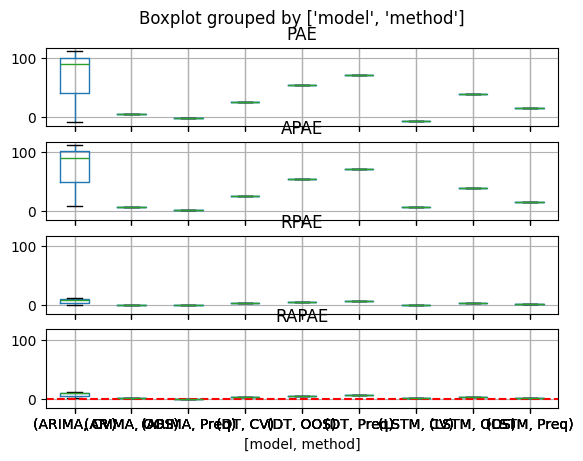

In [34]:
boxplots(iteration_data, "mse")